# Customer Profiling - Slimfit Case Study

### About Slimfit

Slimfit is a leading brand in the field of fitness equipment. Slimfit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at Slimfit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each Slimfit treadmill product by developing appropriate tables and charts.
For each Slimfit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the Slimfit stores during the prior three months. The dataset has the following features:

`!gdown 1jpsnUDdschJczhpxdizjud-jZAA-GBeY`

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

* The KP281 is an entry-level treadmill that sells for \$1,500.
* The KP481 is for mid-level runners that sell for \$1,750.
* The KP781 treadmill is having advanced features that sell for \$2,500.

### Steps to follow

* Defining Problem Statement and Analysing basic metrics (10 Points)
  * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
* Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
* Non-Graphical Analysis: Value counts and unique attributes (10 Points)
* Visual Analysis - Univariate & Bivariate (30 Points)
  * For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
  * For categorical variable(s): Boxplot (10 Points)
  * For correlation: Heatmaps, Pairplots(10 Points)
* Missing Value & Outlier Detection (10 Points)
  * Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median) 
* Business Insights based on Non-Graphical and Visual Analysis (10 Points)
  * Comments on the range of attributes
  * Comments on the distribution of the variables and relationship between them
  * Comments for each univariate and bivariate plot
* Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
  * Some recommendations and actionable insights, based on the inferences.

### Questions

* Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
* Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
* Check correlation among different factors using heat maps or pair plots.
* With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
* Customer Profiling - Categorization of users.
* Probability- marginal, conditional probability.

### Disclaimer

This analysis is based on the data provided and reflects the state of the dataset as of the time of the analysis. The insights and recommendations are derived solely from my point of view and the dataset in question do not necessarily represent the broader operations or circumstances of the company. The analysis assumes the accuracy of the data as received and has not been independently verified. Future analyses may yield different insights as new data becomes available or as business conditions change.

### Note on Results

Due to the large volume of results generated by this analysis, only a subset has been presented here to illustrate the key trends and patterns. Specifically, the top 10 to 15 results have been included as screenshots to provide a snapshot of the most relevant findings. For a complete view of the data and to explore additional insights, please refer to the full dataset.

# PREP FOR ANALYSIS

In [44]:
%pip install --quiet pandas
%pip install --quiet numpy
%pip install --quiet matplotlib
%pip install --quiet seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
sns.set_theme(style="whitegrid")

# OBSERVE DATASET

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


SHAPE:------------ 
(180, 9)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
INFO:------------ 
None



% MISSING:------------ 
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64



% TOTAL MISSING:------------ 
0



% DUPLICATES:------------ 
0





<Axes: >

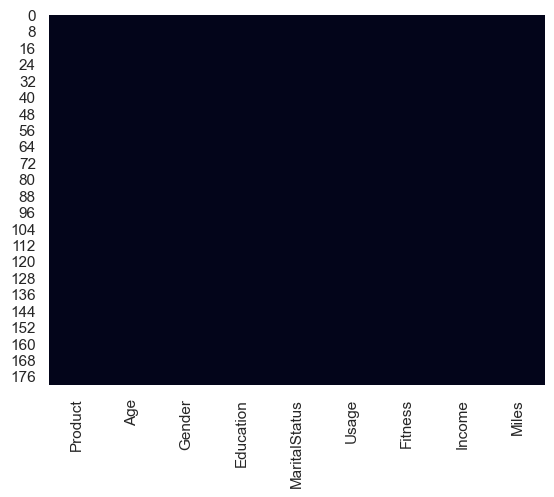

In [46]:
df = pd.read_csv("Slimfit_treadmill.csv")
display(df.head())
print(f"SHAPE:------------ \n{df.shape}\n\n\n")
print(f"INFO:------------ \n{df.info()}\n\n\n")
print(f"% MISSING:------------ \n{df.isnull().sum()}\n\n\n")
print(f"% TOTAL MISSING:------------ \n{df.isnull().sum().sum()}\n\n\n")
print(f"% DUPLICATES:------------ \n{df.duplicated().sum()}\n\n\n")
sns.heatmap(df.isnull(), cbar=False)

# CLEAN & OPTIMISE DATA

* `object`: Default type for string. High memory. If 1000 same objects, stores 1000 of them. Allows all values.
* `category`: Optimised for repetitive data. If 1000 same objects, stores 1 of them. Throws error for non-category values.

In [47]:
# Types: number, object, bool, datetime, int64
cat_cols = df.select_dtypes(include=["object"]).columns
for c in cat_cols:
    df[c] = df[c].astype("category")
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

### Conclusion
* Is dataset explorable? Yes
* Yes

# DESCRIPTIVE STATS

In [48]:
print(f"SUMMARY OF CATEGORICAL VARS:------------ \n{df.describe(include=['object', 'category'])}\n\n\n")

# Mean, median gap
numeric_cols = df.select_dtypes(include=["number"]).columns
df_stats = df[numeric_cols].describe().T
df_stats["median"] = df[numeric_cols].median()
df_stats["mean_minus_median"] = df[numeric_cols].mean() - df[numeric_cols].median()
print(f"SUMMARY OF NUMERICAL VARS:------------ \n{df_stats.round(2)}\n\n\n")

print(f"UNQIUE VALUES PER COL:------------ \n{df.nunique()}")

SUMMARY OF CATEGORICAL VARS:------------ 
       Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      KP281   Male     Partnered
freq        80    104           107



SUMMARY OF NUMERICAL VARS:------------ 
           count      mean       std      min       25%      50%       75%  \
Age        180.0     28.79      6.94     18.0     24.00     26.0     33.00   
Education  180.0     15.57      1.62     12.0     14.00     16.0     16.00   
Usage      180.0      3.46      1.08      2.0      3.00      3.0      4.00   
Fitness    180.0      3.31      0.96      1.0      3.00      3.0      4.00   
Income     180.0  53719.58  16506.68  29562.0  44058.75  50596.5  58668.00   
Miles      180.0    103.19     51.86     21.0     66.00     94.0    114.75   

                max   median  mean_minus_median  
Age            50.0     26.0               2.79  
Education      21.0     16.0              -0.43  
Usage           7.0      3.0          

# MONEY LENS (REVENUE PROXY)

In [49]:
PRICES = {"KP281": 1500, "KP481": 1750, "KP781": 2500}
df["Price"] = df["Product"].astype(str).map(PRICES)

prod_counts = df["Product"].value_counts().reindex(["KP281","KP481","KP781"])
prod_mix = (prod_counts / len(df)).round(4)

rev_by_product = (prod_counts * pd.Series(PRICES)).reindex(prod_counts.index)
rev_mix = (rev_by_product / rev_by_product.sum()).round(4)

money_table = pd.DataFrame({
    "Units": prod_counts,
    "UnitShare": prod_mix,
    "ListPrice": [PRICES[p] for p in prod_counts.index],
    "RevenueProxy": rev_by_product,
    "RevenueShare": rev_mix
})
print("\nUnit mix vs revenue mix (proxy using list price):\n", money_table)


Unit mix vs revenue mix (proxy using list price):
          Units  UnitShare  ListPrice  RevenueProxy  RevenueShare
Product                                                         
KP281       80     0.4444       1500        120000        0.3692
KP481       60     0.3333       1750        105000        0.3231
KP781       40     0.2222       2500        100000        0.3077


# OUTLIER DETECTION (IQR)

In [50]:
def iqr_outlier_info(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lower) | (s > upper)
    return lower, upper, mask

outlier_rows = []
for col in ["Age","Education","Usage","Fitness","Income","Miles"]:
    lower, upper, mask = iqr_outlier_info(df[col])
    outlier_rows.append([col, lower, upper, int(mask.sum())])
outlier_df = pd.DataFrame(outlier_rows, columns=["Variable","IQR_Lower","IQR_Upper","Outliers_Count"])
print("\nIQR outlier summary:\n", outlier_df)

# Optional: see where income outliers sit (often premium segment)
_, _, income_out = iqr_outlier_info(df["Income"])
print("\nIncome outliers by Product:\n", df.loc[income_out, "Product"].value_counts())


IQR outlier summary:
     Variable  IQR_Lower  IQR_Upper  Outliers_Count
0        Age     10.500     46.500               5
1  Education     11.000     19.000               4
2      Usage      1.500      5.500               9
3    Fitness      1.500      5.500               2
4     Income  22144.875  80581.875              19
5      Miles     -7.125    187.875              13

Income outliers by Product:
 Product
KP781    19
KP281     0
KP481     0
Name: count, dtype: int64


# PROBABILITIES (CONTINGENCY TABLE)

In [51]:
def contingency_probs(row_var: str, col_var: str):
    ct = pd.crosstab(df[row_var], df[col_var])
    joint = ct / ct.values.sum()

    row_marg = joint.sum(axis=1)          # P(row)
    col_marg = joint.sum(axis=0)          # P(col)

    # Conditionals
    p_row_given_col = joint.div(col_marg, axis=1)   # P(row | col)
    p_col_given_row = joint.div(row_marg, axis=0)   # P(col | row)

    return ct, joint, row_marg, col_marg, p_row_given_col, p_col_given_row

# Core two-way tables required
ct_pg, joint_pg, p_prod, p_gender, P_prod_given_gender, P_gender_given_prod = contingency_probs("Product", "Gender")
ct_pm, joint_pm, _, _, P_prod_given_marital, P_marital_given_prod = contingency_probs("Product", "MaritalStatus")

print("\nContingency: Product x Gender (counts)\n", ct_pg)
print("\nP(Product | Gender)\n", P_prod_given_gender.round(4))
print("\nP(Gender | Product)\n", P_gender_given_prod.round(4))

print("\nContingency: Product x MaritalStatus (counts)\n", ct_pm)
print("\nP(Product | MaritalStatus)\n", P_prod_given_marital.round(4))
print("\nP(MaritalStatus | Product)\n", P_marital_given_prod.round(4))

# More useful conditionals (strong levers)
ct_pf, _, _, _, P_prod_given_fitness, _ = contingency_probs("Product", "Fitness")
ct_pu, _, _, _, P_prod_given_usage, _ = contingency_probs("Product", "Usage")

print("\nP(Product | Fitness)\n", P_prod_given_fitness.round(4))
print("\nP(Product | Usage)\n", P_prod_given_usage.round(4))

# Income quartiles (money lens)
df["IncomeBand"] = pd.qcut(df["Income"], q=4, labels=["Q1 (Low)","Q2","Q3","Q4 (High)"])
ct_pi = pd.crosstab(df["Product"], df["IncomeBand"])
joint_pi = ct_pi / ct_pi.values.sum()
P_prod_given_income_band = joint_pi.div(joint_pi.sum(axis=0), axis=1)
print("\nP(Product | Income Quartile)\n", P_prod_given_income_band.round(4))


Contingency: Product x Gender (counts)
 Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33

P(Product | Gender)
 Gender   Female    Male
Product                
KP281    0.5263  0.3846
KP481    0.3816  0.2981
KP781    0.0921  0.3173

P(Gender | Product)
 Gender   Female    Male
Product                
KP281    0.5000  0.5000
KP481    0.4833  0.5167
KP781    0.1750  0.8250

Contingency: Product x MaritalStatus (counts)
 MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17

P(Product | MaritalStatus)
 MaritalStatus  Partnered  Single
Product                         
KP281             0.4486  0.4384
KP481             0.3364  0.3288
KP781             0.2150  0.2329

P(MaritalStatus | Product)
 MaritalStatus  Partnered  Single
Product                         
KP281              0.600   0.400
KP481              0.600   0.4

# CHART SET

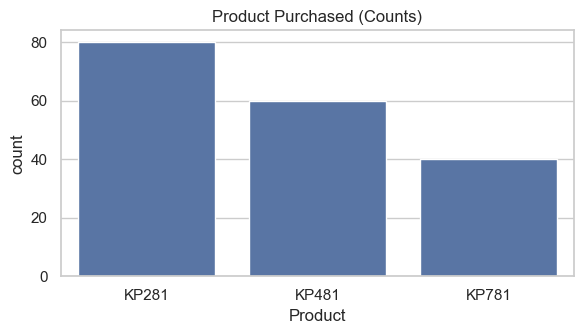

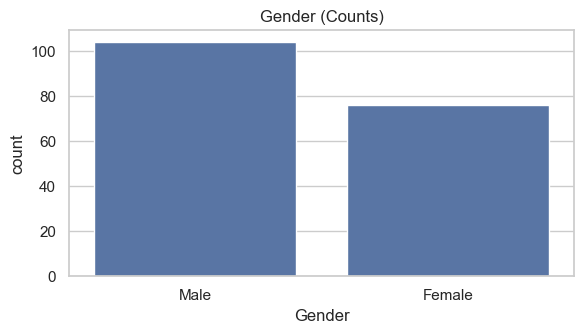

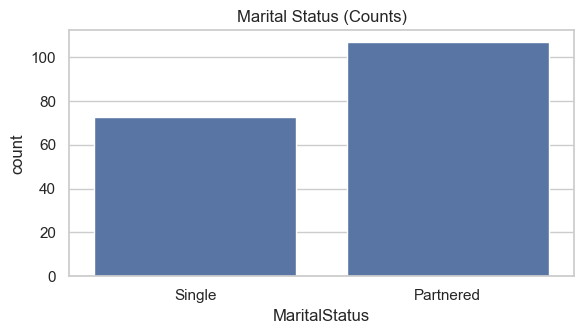

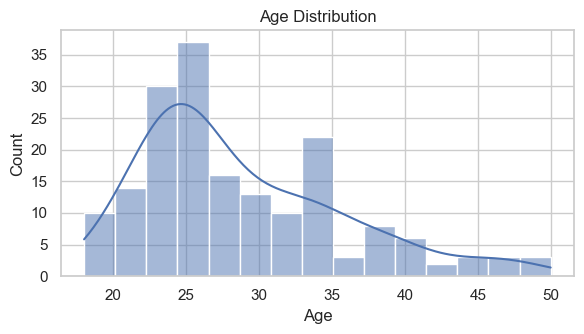

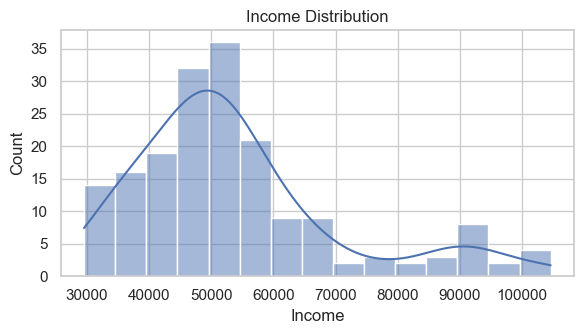

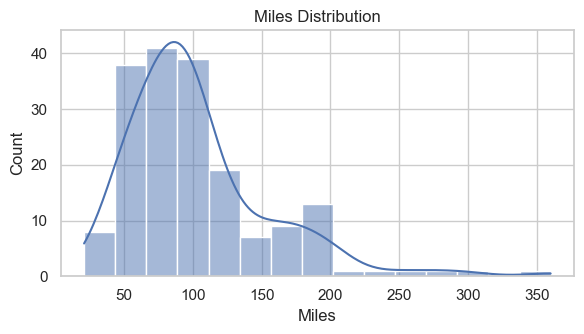

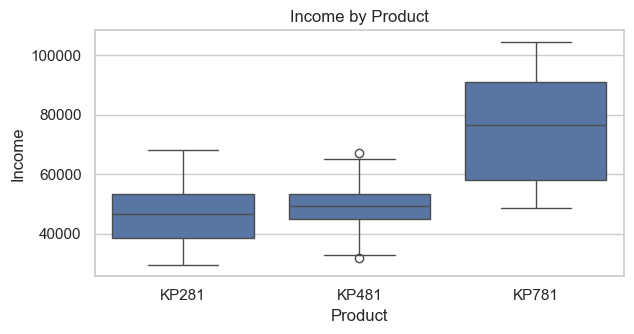

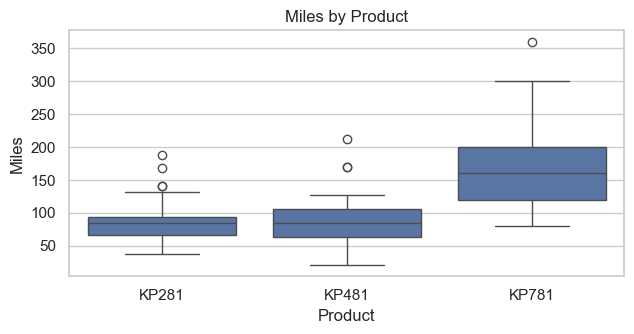

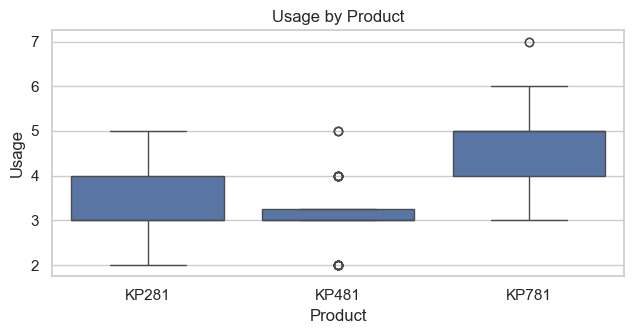

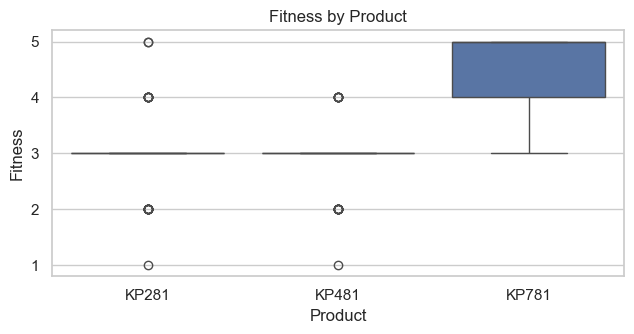

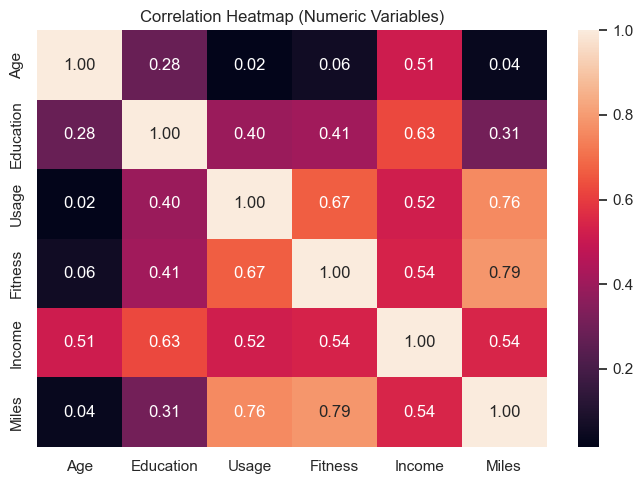

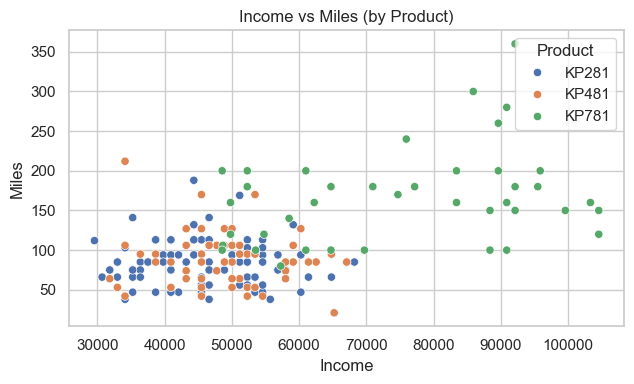

In [52]:
# (1) Product counts
fig, ax = plt.subplots(figsize=(6,3.5))
sns.countplot(data=df, x="Product", order=["KP281","KP481","KP781"], ax=ax)
ax.set_title("Product Purchased (Counts)")
plt.tight_layout()
plt.show()

# (2) Gender counts
fig, ax = plt.subplots(figsize=(6,3.5))
sns.countplot(data=df, x="Gender", order=["Male","Female"], ax=ax)
ax.set_title("Gender (Counts)")
plt.tight_layout()
plt.show()

# (3) Marital status counts
fig, ax = plt.subplots(figsize=(6,3.5))
sns.countplot(data=df, x="MaritalStatus", order=["Single","Partnered"], ax=ax)
ax.set_title("Marital Status (Counts)")
plt.tight_layout()
plt.show()

# (4–6) Key numeric distributions
for col in ["Age","Income","Miles"]:
    fig, ax = plt.subplots(figsize=(6,3.5))
    sns.histplot(data=df, x=col, bins=15, kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

# (7–10) Strong product separators (boxplots)
for col in ["Income","Miles","Usage","Fitness"]:
    fig, ax = plt.subplots(figsize=(6.5,3.5))
    sns.boxplot(data=df, x="Product", y=col, order=["KP281","KP481","KP781"], ax=ax)
    ax.set_title(f"{col} by Product")
    plt.tight_layout()
    plt.show()

# (11) Correlation heatmap (numeric only)
fig, ax = plt.subplots(figsize=(7,5))
corr = df[["Age","Education","Usage","Fitness","Income","Miles"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap (Numeric Variables)")
plt.tight_layout()
plt.show()

# (12) Income vs Miles colored by product (money + intensity story)
fig, ax = plt.subplots(figsize=(6.5,4))
sns.scatterplot(data=df, x="Income", y="Miles", hue="Product", ax=ax)
ax.set_title("Income vs Miles (by Product)")
plt.tight_layout()
plt.show()

# CUSTOMER PROFILE TABLE (PRODUCT-WISE)

In [53]:
profile = df.groupby("Product", observed=False).agg(
    Customers=("Product","size"),
    Age_median=("Age","median"),
    Income_median=("Income","median"),
    Usage_median=("Usage","median"),
    Fitness_median=("Fitness","median"),
    Miles_median=("Miles","median"),
    Education_median=("Education","median"),
).reindex(["KP281","KP481","KP781"])
print("\nCustomer profile (medians):\n", profile)


Customer profile (medians):
          Customers  Age_median  Income_median  Usage_median  Fitness_median  \
Product                                                                       
KP281           80        26.0        46617.0           3.0             3.0   
KP481           60        26.0        49459.5           3.0             3.0   
KP781           40        27.0        76568.5           5.0             5.0   

         Miles_median  Education_median  
Product                                  
KP281            85.0              16.0  
KP481            85.0              16.0  
KP781           160.0              18.0  


# MONEY-FOCUSED SEGMENT KPIs

In [54]:
seg_asp_gender = df.groupby("Gender", observed=False)["Price"].agg(Customers="size", AvgPrice="mean", Revenue="sum")
seg_asp_fitness = df.groupby("Fitness", observed=False)["Price"].agg(Customers="size", AvgPrice="mean", Revenue="sum")
seg_asp_usage = df.groupby("Usage", observed=False)["Price"].agg(Customers="size", AvgPrice="mean", Revenue="sum")

print("\nASP/Revenue by Gender:\n", seg_asp_gender.round(2))
print("\nASP/Revenue by Fitness:\n", seg_asp_fitness.round(2))
print("\nASP/Revenue by Usage:\n", seg_asp_usage.round(2))


ASP/Revenue by Gender:
         Customers  AvgPrice  Revenue
Gender                              
Female         76   1687.50   128250
Male          104   1891.83   196750

ASP/Revenue by Fitness:
          Customers  AvgPrice  Revenue
Fitness                              
1                2   1625.00     3250
2               26   1615.38    42000
3               97   1641.75   159250
4               24   1875.00    45000
5               31   2435.48    75500

ASP/Revenue by Usage:
        Customers  AvgPrice  Revenue
Usage                              
2             33   1606.06    53000
3             69   1626.81   112250
4             52   1903.85    99000
5             17   2250.00    38250
6              7   2500.00    17500
7              2   2500.00     5000


# KEY BUSINESS ANSWERS

In [55]:
print("\nKey probability:")
print("P(KP781 | Male)   =", round(float(P_prod_given_gender.loc["KP781","Male"]), 4))
print("P(KP781 | Female) =", round(float(P_prod_given_gender.loc["KP781","Female"]), 4))
print("P(KP781 | Fitness=5) =", round(float(P_prod_given_fitness.loc["KP781",5]), 4))
print("P(KP781 | Usage=5)   =", round(float(P_prod_given_usage.loc["KP781",5]), 4))
print("P(KP781 | Income Q4) =", round(float(P_prod_given_income_band.loc["KP781","Q4 (High)"]), 4))



Key probability:
P(KP781 | Male)   = 0.3173
P(KP781 | Female) = 0.0921
P(KP781 | Fitness=5) = 0.9355
P(KP781 | Usage=5)   = 0.7059
P(KP781 | Income Q4) = 0.6444


# CONCLUSION

## Executive summary

* **KP281 drives volume** (44.44% of buyers), but **KP781 drives disproportionate revenue per customer** because of its higher price.
* The clearest separators for **premium (KP781) purchase** are **Fitness**, **Usage frequency**, **Miles/week**, and **Income**.
* **Marital status is not very useful** for product recommendation (patterns are similar across products).

---

## Product mix and revenue mix (money lens)

**Unit mix (share of customers):**

* KP281: **44.44%** (80/180)
* KP481: **33.33%** (60/180)
* KP781: **22.22%** (40/180)

**Revenue proxy mix (using list prices):**

* KP281: **36.92%**
* KP481: **32.31%**
* KP781: **30.77%**

**Interpretation:** Even with fewer buyers, **KP781 contributes nearly one-third of revenue**. Improving KP781 conversion even slightly can raise overall revenue meaningfully.

---

## Customer profiles by treadmill (what each product “means”)

### KP281 (Entry, $1,500)

Typical buyer profile:

* **Income (median):** ~$46.6k
* **Fitness (median):** 3/5
* **Usage (median):** 3x/week
* **Miles (median):** ~85 miles/week
  **Role in business:** high-volume entry product; best for onboarding new customers and bundling accessories/warranty.

### KP481 (Mid, $1,750)

Typical buyer profile (very similar to KP281):

* **Income (median):** ~$49.5k
* **Fitness (median):** 3/5
* **Usage (median):** 3x/week
* **Miles (median):** ~85 miles/week
  **Role in business:** a “step-up” model, but in this dataset it’s not sharply differentiated from KP281—so sales positioning matters.

### KP781 (Premium, $2,500)

Typical buyer profile (strongly distinct):

* **Income (median):** ~$76.6k
* **Fitness (median):** 5/5
* **Usage (median):** 5x/week
* **Miles (median):** ~160 miles/week
  **Role in business:** premium segment (high-intensity users + higher purchasing power); major lever for raising revenue per customer.

---

## Probability insights (simple, decision-friendly)

These are directly usable as “recommendation rules” in-store or online.

### 1) Gender and premium purchase

* **P(KP781 | Male) = 0.3173** (~3 in 10 male customers)
* **P(KP781 | Female) = 0.0921** (~1 in 11 female customers)
* Among KP781 buyers: **82.5% are male**

**Business meaning:** Premium purchases skew male in this sample. This could be an opportunity to improve premium conversion among female customers through messaging and sales flow.

---

### 2) Marital status is weak for recommendation

* **P(KP781 | Partnered) = 0.2150**
* **P(KP781 | Single) = 0.2329**

**Business meaning:** Marital status doesn’t meaningfully change product choice—don’t rely on it for targeting.

---

### 3) Fitness is an extremely strong premium signal

* **P(KP781 | Fitness=5) = 0.9355** (almost certain premium)
* **P(KP781 | Fitness=3) = 0.0412** (very unlikely premium)

**Business meaning:** Fitness rating is one of the best “first questions” to route customers to the right model.

---

### 4) Usage frequency strongly predicts premium

* **P(KP781 | Usage=5) = 0.7059** (~7 in 10)
* **P(KP781 | Usage=6 or 7) = 1.00** (all customers in this data)

**Business meaning:** Usage intent is a clean upsell trigger. Heavy users should be guided away from entry models.

---

### 5) Income tier strongly predicts premium

Using income quartiles:

* **P(KP781 | highest income quartile) = 0.6444**
* **P(KP781 | lowest income quartile) = 0.00**

**Business meaning:** Premium targeting should focus on higher-income segments; broad premium promotion to low-income segments wastes spend.

---

## Outliers (why they matter)

* Income and Miles have upper-end outliers, and these outliers are **heavily concentrated in KP781**.
* This is not “bad data”—it likely represents **serious runners and high purchasing power**, which are exactly the customers that sustain premium revenue.

---

## Recommendations (plain, actionable, money-focused)

### 1) Add a simple “2-question recommendation” flow to increase premium conversion

In-store + online quiz:

1. “How many times per week will you use it?”
2. “How would you rate your fitness (1–5)?”

**Suggested rules:**

* Fitness = 5 → recommend **KP781** (≈94% premium likelihood)
* Usage ≥ 5 → recommend **KP781** (≈71% at 5; ~100% at 6–7)
* Otherwise → KP281/KP481 based on budget and comfort features

**Money impact:** Higher conversion to KP781 increases average revenue per customer.

---

### 2) Position KP481 more clearly (it’s currently too close to KP281 in buyer behavior)

Because KP481 buyers look similar to KP281 buyers in this dataset, sales teams should **sharpen the difference**:

* Sell KP481 as the “best value upgrade” for moderate consistency users (3–4x/week) who want extra durability/comfort.
* Offer bundles: maintenance plan + accessories to increase basket size.

**Money impact:** Improves attachment revenue + reduces KP481 being “stuck in the middle.”

---

### 3) Target premium marketing to the right signals (reduce wasted spend)

Prioritize audiences and creatives around:

* High usage intentions (5x/week+)
* High fitness / runner identity
* Higher income segments (top quartile)
* High miles expectations

Avoid broad premium pushes where conversion is near zero (low usage / low income groups).

---

### 4) Close the gender gap for premium (growth opportunity)

Since KP781 purchases skew male in this sample:

* Test different premium messaging for women (comfort, stability, training programs, long-term joint-friendly running/walking)
* Use female-focused creatives and testimonials
* Ensure sales reps apply the same “qualifier questions” to all customers (to avoid recommendation bias)

**Money impact:** Even small lifts in female KP781 conversion raise total revenue because KP781 has high price.

---

### 5) Use KP281 as the acquisition product, then upsell later

KP281 is the volume driver:

* Use it to bring customers in
* Capture contact info
* Follow up after 4–8 weeks with an upgrade offer if usage is high (or if they’re buying running accessories)

**Money impact:** Converts entry-level customers into higher lifetime value customers.

---

## Limitations

* This dataset includes **only purchasers** (not non-buyers), so insights support **recommendation and targeting among buyers**, not total market demand prediction.
* Revenue is a **proxy** using list prices (profit/margins are not included), so conclusions focus on **revenue opportunity**, not profitability.

